
## Baseline Model 
#### The basline model uses a simple algorithm that relies on a set of keywords/keywords occurences to determine if a given document is more likely to be informational or commercial

The purpose of the baseline model is to have a basline performance to comapre our machine learning models

In [9]:
import pandas as pd 

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics


import matplotlib.pyplot as plt
import scikitplot as skplt


In [10]:
# import the dataset and select a subset
df = pd.read_csv('../data/task1_dataset.csv').drop(columns = 'Unnamed: 0')

test = df[0:3000]
test

,label,text
0,0,"""My Thistle subscription has changed my work f..."
1,0,"After I bought this toy for my child, he staye..."
2,0,A Black Friday purchase you actually won't reg...
3,0,"The Nutcracker, accompany you and your family ..."
4,0,ohora’s NEW COLLECTION - shop right away https...
...,...,...
2995,1,"For all underrepresented communities, language..."
2996,1,Do you live in Florida? Join our study and earn!
2997,1,We must continue to come together to demand ...
2998,1,This November were voting YES on Question 1 to...


In [11]:
def classification_fun(text):
  '''
    Classification function based on list of keywords for each category (baseline model)
    params: 
      text : a text document
    Returns :
      1 : if the document is informational 
      0 : if the doucment is commercial
  ''' 
  words = text.lower().split()

  count_com = 0               # counter for informational word occurences
  count_inf = 0               # counter for commercial word occurences

  result = 1                  

  # informational advertising keywords list
  list_inf=['donation', 'donate', 'donater', 'charity','non profit','non-profit','covid-19','join','alert!','urgent','urgently',
            'help','research','recruit','refugee','homeless','participate','participant','volunteer','sign','cancer','diagnosis',
            'diagnosed','mobilize','mobilization','support', 'supporting','supported', 'environment','vote','voter','elect',
            'elected','electoral','re-election', 'election','campaign','fundraiser','fundraising','fund','president', 'cause',
            'foundation','lawmaker','degree','university','humanitarian','crisis','activist','protester','survey','theories theory','conspiracy','urgent']


 # commercial advertising keywords list
  list_com=['deluxe','luxury','shop','collection', 'shop now','order','win','sale','free','order','off!','off','delivered','limited',
            'edition','get off','limited time offer','product','price','get more','get out more','get','purchase','free trial','upgrade',
            'for just','discount','offer','exclusive offer','deliver','gift','available now','free shipping','selling','from just','check out','collection','buy ']


 # if the word is in inf list increment inf counter 
  for w in words:
      if w in list_inf:
        count_inf += 1
      if w in list_com:
        count_com += 1
        
  # return commercial if commercial counter is superior informational else 
  if (count_com>count_inf):
    return 0
  else :
    return 1  

               precision    recall  f1-score   support

   Commercial       0.83      0.49      0.62      1469
Informational       0.65      0.90      0.76      1531

     accuracy                           0.70      3000
    macro avg       0.74      0.70      0.69      3000
 weighted avg       0.74      0.70      0.69      3000

confusion matrix:
[[ 727  742]
 [ 148 1383]]



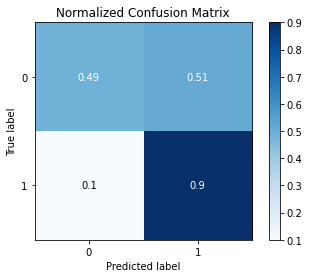

In [12]:
# pass sampled data to the classification function 
result = map(classification_fun,test['text'])
predictions=list(result)

# measure the accuracy of the baseline model
accuracy_score(test['label'].to_list(),predictions)
print(metrics.classification_report(test['label'], predictions, target_names=['Commercial', 'Informational']))

print("confusion matrix:")
print(metrics.confusion_matrix(test['label'], predictions))
print()
skplt.metrics.plot_confusion_matrix(test['label'], predictions, normalize=True)
plt.show()
